# Principle Component Analysis
Next I applies PCA to the 10 examples in an attempt to visualize diffrences between reduced subreddit content vectors in 3-dimensional space. The code below uses color_map and a loop for plotting each sub in order to preserve correspondence between individual subs and plotted points

<IPython.core.display.Javascript object>


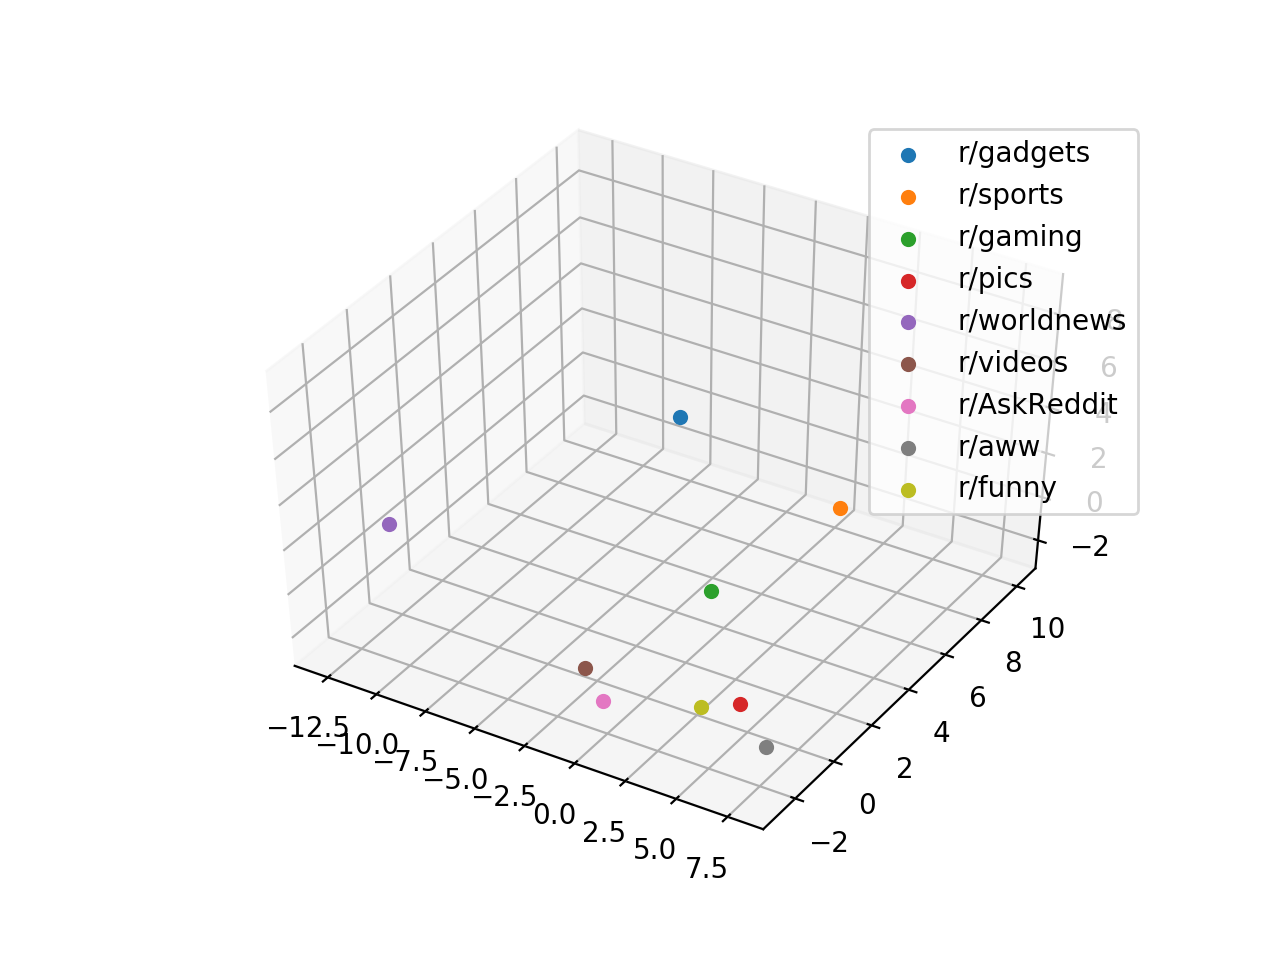

In [14]:
%matplotlib notebook
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

count_set = pd.read_csv('../data/counts.csv')
feature_set = pd.read_csv('../data/data.csv')

X = np.transpose(feature_set.values)
m = X.shape[0]
covar_mat = np.dot(np.transpose(X),X) / m
U, S, V = linalg.svd(covar_mat)
U_reduce = U[:,0:3]
Z_all = np.dot(X,U_reduce)

color_map = {}
color_map['colors']=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
color_map['names']=['r/gadgets','r/sports','r/gaming','r/pics','r/worldnews','r/videos','r/AskReddit','r/aww','r/funny','r/news']
ax = plt.axes(projection='3d')
x = Z_all[:,0]
y = Z_all[:,1]
z = Z_all[:,2]
for i in range(0,m-1):
        ax.scatter(x[i], y[i], z[i], c=color_map['colors'][i], cmap='plasma', label=color_map['names'][i])
plt.legend()
plt.show()

The exciting thing is that clusters start to appear even with this small number of examples and large dimensionality reduction. Data-point spacial relationships make a little bit of sense as well, with r/gadgets being fairly removed from other subs, but with r/gaming as its closest neighbour.